In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [25]:
X,y = make_classification(n_samples=1000,n_classes=2 , random_state=1)

In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [27]:
## Create a dummy model with default 0
dummy_model_prob = [0 for _ in range(len(y_test))]

In [28]:
# Model Training
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [29]:
log.fit(X_train,y_train)

LogisticRegression()

In [30]:
## Prediction based on prob
model_prob = log.predict_proba(X_test)

In [31]:
model_prob

array([[9.58775327e-04, 9.99041225e-01],
       [9.03113399e-01, 9.68866009e-02],
       [5.10627964e-01, 4.89372036e-01],
       [1.89953026e-01, 8.10046974e-01],
       [8.87573193e-01, 1.12426807e-01],
       [5.60127995e-01, 4.39872005e-01],
       [1.70539186e-01, 8.29460814e-01],
       [2.86177560e-01, 7.13822440e-01],
       [1.12292117e-01, 8.87707883e-01],
       [1.32026145e-01, 8.67973855e-01],
       [9.99456145e-01, 5.43854787e-04],
       [1.68799639e-01, 8.31200361e-01],
       [8.08969781e-01, 1.91030219e-01],
       [4.60946921e-01, 5.39053079e-01],
       [2.71939746e-01, 7.28060254e-01],
       [1.76492952e-01, 8.23507048e-01],
       [6.14129577e-02, 9.38587042e-01],
       [3.61632696e-01, 6.38367304e-01],
       [8.89840189e-01, 1.10159811e-01],
       [7.58965653e-01, 2.41034347e-01],
       [9.88414268e-01, 1.15857322e-02],
       [5.09845298e-01, 4.90154702e-01],
       [1.11914893e-01, 8.88085107e-01],
       [2.05189797e-03, 9.97948102e-01],
       [8.630545

In [32]:
## focus on positive outcome
model_prob = model_prob[:,1]

In [33]:
## AUC scores
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


In [35]:
dummy_fpr , dummy_tpr, _ = roc_curve(y_test , dummy_model_prob)
model_fpr , model_tpr, _ = roc_curve(y_test , model_prob)

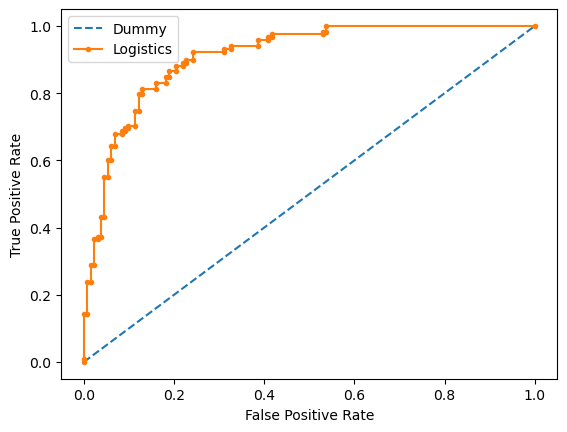

In [40]:
from cProfile import label


plt.plot(dummy_fpr, dummy_tpr, linestyle= '--', label='Dummy')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()